# Descarga desde la base de datos de NOAA

In [1]:
from ftplib import FTP
host = 'ftp2.psl.noaa.gov'
ftp = FTP(host)
ftp.login()
path = '/Datasets/noaa.ersst.v5'
ftp.cwd(path)
filename = 'sst.mnmean.nc'
#ftp.size(filename)
ftp.retrbinary("RETR " + filename, open(filename, 'wb').write)
ftp.close()

# Tratamiento de datos

## Línea de tiempo

### Variación de la temperatura desde 1981

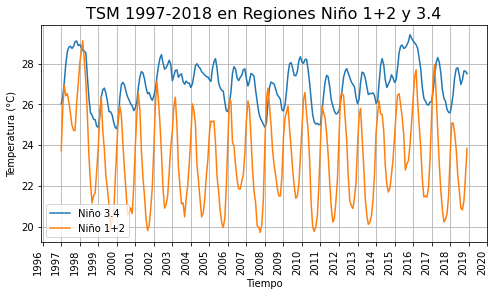

In [55]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline
dset = xr.open_dataset(filename)
data_sst = dset.sst.sel(lat=slice(0,-10),lon=slice(270,280),time=slice("1997-01-01","2018-12-01"))
data_sst2 = dset.sst.sel(lat=slice(5,-5), lon=slice(190,240),time=slice("1997-01-01","2018-12-01"))
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
data_sst2.mean(dim=['lon','lat']).plot(ax=ax)
data_sst.mean(dim=['lon','lat']).plot(ax=ax)
ax.set_title('TSM 1997-2018 en Regiones Niño 1+2 y 3.4', fontsize=16)
ax.legend(['Niño 3.4','Niño 1+2'])
ax.set(xlabel='Tiempo', ylabel='Temperatura (°C)')

x_ticks_range = pd.date_range("1996-01-01","2020-01-01",freq='YS')
xticks_label = []
for x in range(25):
  xticks_label.append(x+1996)

plt.xticks(x_ticks_range, labels=xticks_label, rotation=90)

ax.grid(True)
plt.savefig('TSM_1997-2018_RegNino1+2_34',bbox_inches='tight',dpi=500)

### Anomalía de la SST en la región Niño 1+2 (1981-2010)

In [3]:
def month_normal_reg12(month):
  """
  Introduce el mes en número pe 
  """
  month = str(month)
  month_sel = dset.sst.sel(time=slice(("1981-"+month+"-01"),"2010-12-01",12), lat=slice(0,-10), lon=slice(270,280))
  month_normal = month_sel.mean(dim='time')
  return month_normal

In [4]:
date_range = pd.date_range("1997-01-01","2018-12-01",freq='MS')
array_data = pd.array(np.zeros(date_range.shape))
i = 1
for x in range(len(date_range)):
  month_sel_anom = dset.sst.sel(time=date_range[x], lat=slice(0,-10), lon=slice(270,280)) - month_normal_reg12(i)
  array_data[x] = month_sel_anom.mean(dim=['lon','lat']).values
  i += 1
  if i == 13:
    i = 1

new_dset = xr.DataArray(data=array_data, dims=['time'], coords=dict(time=date_range))

### Anomalía de la SST en la región Niño 3.4 (1981-2010)

In [5]:
def month_normal_reg34(month):
  """
  Introduce el mes en número pe 
  """
  month = str(month)
  month_sel = dset.sst.sel(time=slice(("1981-"+month+"-01"),"2010-12-01",12), lat=slice(5,-5), lon=slice(190,240))
  month_normal = month_sel.mean(dim='time')
  return month_normal

In [6]:
date_range = pd.date_range("1997-01-01","2018-12-01",freq='MS')
array_data = pd.array(np.zeros(date_range.shape))
i = 1
for x in range(len(date_range)):
  month_sel_anom = dset.sst.sel(time=date_range[x], lat=slice(5,-5), lon=slice(190,240)) - month_normal_reg34(i)
  array_data[x] = month_sel_anom.mean(dim=['lon','lat']).values
  i += 1
  if i == 13:
    i = 1

new_dset2 = xr.DataArray(data=array_data, dims=['time'], coords=dict(time=date_range))

Juntar las dos graficas de regiones 1+2 y 3.4 en un subplot con leyenda


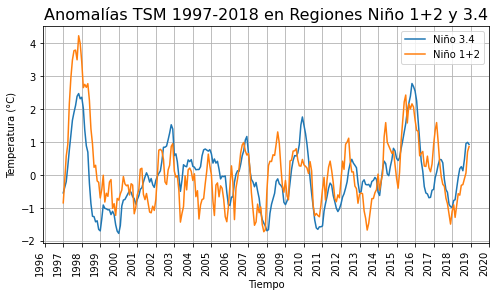

In [28]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
new_dset2.plot(ax=ax)
new_dset.plot(ax=ax)
ax.set_title('Anomalías TSM 1997-2018 en Regiones Niño 1+2 y 3.4', fontsize=16)
ax.set(xlabel='Tiempo', ylabel='Temperatura (°C)')

x_ticks_range = pd.date_range("1996-01-01","2020-01-01",freq='YS')
xticks_label = []
for x in range(25):
  xticks_label.append(x+1996)

plt.xticks(x_ticks_range, labels=xticks_label, rotation=90)
ax.grid(True)
ax.legend(['Niño 3.4','Niño 1+2'])
plt.savefig('Anom_TSM1997-2018_Nino1+2_34',bbox_inches='tight',dpi=500)

## Gráfica de datos mensuales

In [ ]:
!pip install cartopy
!pip install --no-binary shapely shapely --force

### Función para graficar y guardar SST mensual

In [ ]:
import matplotlib.pyplot as plt
import cartopy.feature as cf
import cartopy.crs as ccrs

def plot_month_sst(year,month):
  """
  plot_month_sst(year,month)
  year = 2010
  month = 3
  """
  year = str(year)
  month = str(month)
  fig_month = plt.figure(figsize=(12,5))
  ax = fig_month.add_subplot(111,projection=ccrs.PlateCarree())
  dset.sst.sel(time=(year + '-' + month + '-01')).plot(ax=ax, transform = ccrs.PlateCarree())
  #ax.add_feature(cf.BORDERS)
  ax.coastlines()
  ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
  ax.set_title(('TSM '+ year + '-' + month), fontsize=16)
  plt.savefig(('TSM '+ year + '-' + month), bbox_inches='tight', dpi=500)

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarnin

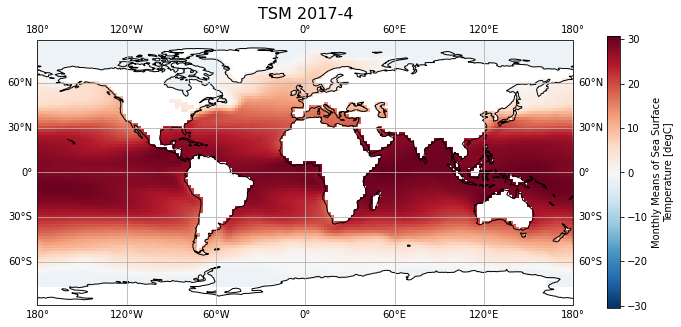

In [ ]:
plot_month_sst(2017,4)

## Cálculo de normal mensual

### Función para el cálculo

In [59]:
def month_normal(month):
  """
  Introduce el mes en número pe 
  """
  month = str(month)
  month_sel = dset.sst.sel(time=slice(("1981-"+month+"-01"),"2010-12-01",12))
  month_normal = month_sel.mean(dim='time')
  return month_normal

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarnin

Text(0.5, 0.98, 'Anomalías TSM Meses 12/2016 - 03/2017')

/usr/local/lib/python3.7/dist-packages/cartopy/mpl/gridliner.py:549: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  elif len(intersection) > 4:
/usr/local/lib/python3.7/dist-packages/cartopy/mpl/gridliner.py:556: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  xy = np.append(intersection[0], intersection[-1],
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4665: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = asanyarray(arr)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4671: ShapelyDeprecationWarning: The array interface is d

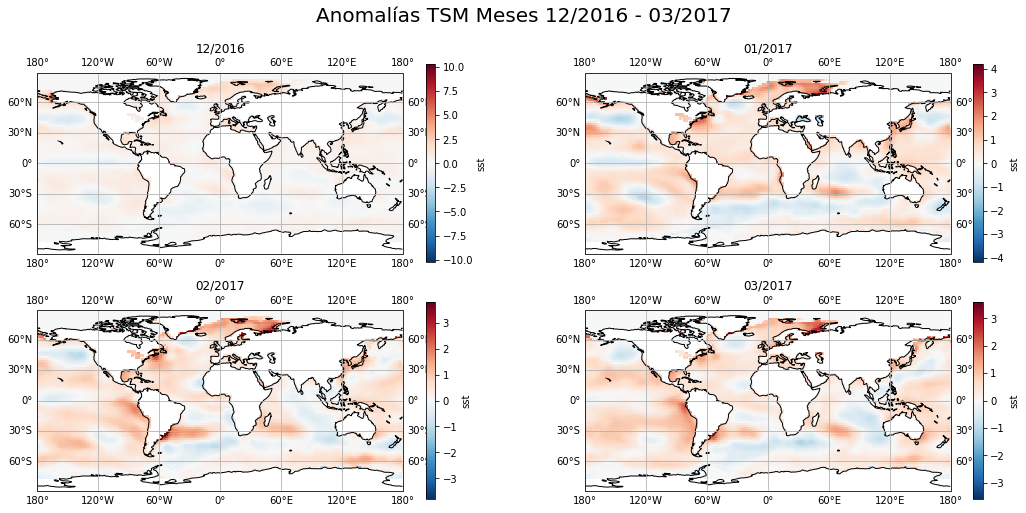

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

dset = xr.open_dataset(filename)
dec_anom = dset.sst.sel(time="2016-12-01") - month_normal(12)
jan_anom = dset.sst.sel(time="2017-01-01") - month_normal(1)
feb_anom = dset.sst.sel(time="2017-02-01") - month_normal(2)
mar_anom = dset.sst.sel(time="2017-03-01") - month_normal(3)


fig = plt.figure(figsize=(18,8))

ax1 = fig.add_subplot(221, projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(222, projection=ccrs.PlateCarree())
ax3 = fig.add_subplot(223, projection=ccrs.PlateCarree())
ax4 = fig.add_subplot(224, projection=ccrs.PlateCarree())

dec_anom.plot(ax=ax1, transform=ccrs.PlateCarree())
jan_anom.plot(ax=ax2, transform=ccrs.PlateCarree())
feb_anom.plot(ax=ax3, transform=ccrs.PlateCarree())
mar_anom.plot(ax=ax4, transform=ccrs.PlateCarree())


ax1.set_title("12/2016")
ax2.set_title("01/2017")
ax3.set_title("02/2017")
ax4.set_title("03/2017")

ax1.set(xlabel="Longitud", ylabel='Latitud')

ax1.coastlines()
ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
ax2.coastlines()
ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
ax3.coastlines()
ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
ax4.coastlines()
ax4.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)

fig.suptitle("Anomalías TSM Meses 12/2016 - 03/2017", fontsize=20)
#plt.savefig('Anom_Global_DJFM1998', bbox_inches='tight', dpi=500)

# Descarga de datos NOAA High Resolution

In [30]:
from ftplib import FTP
host = 'ftp2.psl.noaa.gov'
ftp = FTP(host)
ftp.login()
path = '/Datasets/noaa.oisst.v2.highres'
ftp.cwd(path)
#ftp.nlst()

'250 Directory successfully changed.'

In [31]:
filename1 = 'sst.day.anom.2014.v2.nc'
ftp.retrbinary("RETR " + filename1, open(filename1, 'wb').write)
filename2 = 'sst.day.anom.2015.v2.nc'
ftp.retrbinary("RETR " + filename2, open(filename2, 'wb').write)
filename3 = 'sst.day.anom.2016.v2.nc'
ftp.retrbinary("RETR " + filename3, open(filename3, 'wb').write)
filename4 = 'sst.day.anom.2017.v2.nc'
ftp.size(filename4)
ftp.retrbinary("RETR " + filename4, open(filename4, 'wb').write)
ftp.close()

##Hovmöller High Resolution

Extraer los datos y crear un nuevo dset con los datos extraidos de los diferentes años

In [32]:
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

dset = xr.open_dataset(filename1)
dset_sel = dset.anom.sel(time=slice("2014-01-01", "2014-12-31"), lon = slice(130,280), lat = slice(-5,5)).mean(dim='lat')

range_date = pd.date_range("2014-01-01","2017-12-31")
lon = dset_sel.lon
darray = xr.DataArray(data=0.0, dims=['time','lon'], coords=dict(time=range_date, lon=lon))

dset = xr.open_dataset(filename1)
dset_sel = dset.anom.sel(time=slice("2014-01-01", "2014-12-31"), lon = slice(130,280), lat = slice(-5,5)).mean(dim='lat')
for x in range(365):
  darray[x] = dset_sel[x]

dset = xr.open_dataset(filename2)
dset_sel = dset.anom.sel(time=slice("2015-01-01", "2015-12-31"), lon = slice(130,280), lat = slice(-5,5)).mean(dim='lat')
for x in range(365):
  darray[x+365] = dset_sel[x]

dset = xr.open_dataset(filename3)
dset_sel = dset.anom.sel(time=slice("2016-01-01", "2016-12-31"), lon = slice(130,280), lat = slice(-5,5)).mean(dim='lat')
for x in range(366):
  darray[x+730] = dset_sel[x]

dset = xr.open_dataset(filename4)
dset_sel = dset.anom.sel(time=slice("2017-01-01", "2017-12-31"), lon = slice(130,280), lat = slice(-5,5)).mean(dim='lat')
for x in range(365):
  darray[x+1096] = dset_sel[x]

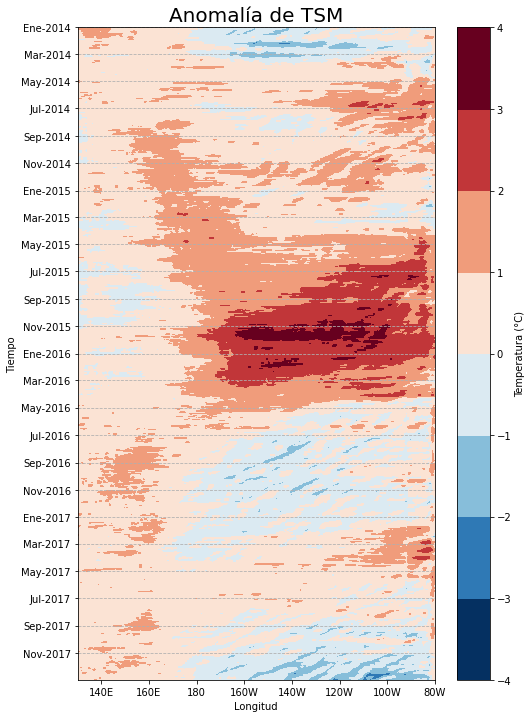

In [53]:
fig = plt.figure(figsize=(8,12))
ax = fig.add_subplot(111)
im = darray.plot.contourf(ax=ax, add_colorbar = False, levels=10, yincrease=False)
ax.set_title("Anomalía de TSM", fontsize=20)
ax.set(xlabel="Longitud", ylabel="Tiempo")

# Crear los valores del eje y y sus labels en formato Mes-Año
yticks_values = pd.date_range("2014-01-01","2017-12-01", freq='2MS')
yticks_labels = []

year = 2014
temp = ''
while temp != 'Nov-2017':
  lst_mon = ['Ene', 'Mar', 'May', 'Jul', 'Sep', 'Nov']
  for i in range(6):
    temp = lst_mon[i] +'-'+ str(year)
    yticks_labels.append(temp)
  year += 1


# Crear los valores del eje x y sus labels
lon_inicial = 140
xticks_values = []
while True:
  xticks_values.append(lon_inicial)
  if lon_inicial == 280:
    break
  lon_inicial += 20
xticks_labels = ['140E', '160E', '180', '160W', '140W', '120W', '100W', '80W']

plt.yticks(yticks_values, yticks_labels)
plt.xticks(xticks_values, xticks_labels)
ax.grid(True, axis='y', linestyle = '--')
cb = plt.colorbar(im)
cb.set_label('Temperatura (°C)')
plt.savefig("Anom_TSM_Hov", bbox_inches='tight', dpi=500)